<a href="https://colab.research.google.com/github/SudharsanSrinivasan14/POC/blob/main/POC_Seperate_Test_and_Train_File_handling_In_KNN_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data On Boarding**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Clean Test.csv to Clean Test.csv


In [3]:
from google.colab import files
uploaded1 = files.upload()

Saving Clean Train.csv to Clean Train.csv


In [4]:
df = pd.read_csv('Clean Test.csv')   # Test File
df1 = pd.read_csv('Clean Train.csv')   # Train File

In [5]:
df

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,DUMMY3,MonthlyInhandSalary,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,Credit_Score
0,0x160a,CUS0xd40,September,Aaron Maashoh,23,821000265.0,Scientist,19114.0,19114.12,1824.84,...,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,LowspentSmallvaluepayments,186.27,Standard
1,0x160b,CUS0xd40,October,Aaron Maashoh,24,821000266.0,Scientist,19114.0,19114.12,1824.84,...,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,HighspentMediumvaluepayments,361.44,Poor
2,0x1623,CUS0x2dbc,October,Langep,35,486853974.0,Engineer,143162.0,143162.64,12187.22,...,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,LowspentLargevaluepayments,788.11,Poor
3,0x162e,CUS0xb891,September,Jasond,55,72316145.0,Entrepreneur,30689.0,30689.89,2612.49,...,Good,632.46,39.38,17 Years and 11 Months,No,16.42,69.11,HighspentMediumvaluepayments,425.73,Standard
4,0x1630,CUS0xb891,November,Jasond,55,72316145.0,Entrepreneur,30689.0,30689.89,2612.49,...,Good,632.46,36.82,18 Years and 1 Months,No,16.42,191.89,LowspentMediumvaluepayments,332.95,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,0x25fd7,CUS0xaf61,October,Chris Wickhamm,50,133167738.0,Writer,37188.0,37188.10,3097.01,...,Good,620.64,23.99,30 Years and 6 Months,No,84.21,10000.00,LowspentLargevaluepayments,270.75,Standard
14891,0x25fd8,CUS0xaf61,November,Chris Wickhamm,50,133167738.0,Writer,37188.0,37188.10,3097.01,...,Good,620.64,25.71,30 Years and 7 Months,No,84.21,183.37,LowspentLargevaluepayments,312.13,Poor
14892,0x25fe2,CUS0x8600,September,Sarah McBridec,29,31350942.0,Architect,20002.0,20002.88,1929.91,...,Bad,3571.70,32.39,6 Years and 4 Months,Yes,60.96,107.21,LowspentSmallvaluepayments,314.82,Poor
14893,0x25fe3,CUS0x8600,October,Sarah McBridec,29,31350942.0,Architect,20002.0,20002.88,1929.91,...,Bad,3571.70,37.53,6 Years and 5 Months,Yes,60.96,71.79,LowspentSmallvaluepayments,350.23,Poor


In [6]:
dt=df.copy()
dt1=df1.copy()

# **EDA**

In [7]:
df.shape

(14895, 29)

In [8]:
df1.shape

(29664, 30)

In [9]:
df.columns

Index(['ID', 'CustomerID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'AnnualIncome', 'DUMMY3', 'MonthlyInhandSalary', 'NumBankAccounts',
       'NumCreditCard', 'InterestRate', 'NumofLoan', 'TypeofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'CreditMix', 'OutstandingDebt',
       'CreditUtilizationRatio', 'CreditHistoryAge', 'PaymentofMinAmount',
       'TotalEMIpermonth', 'Amountinvestedmonthly', 'PaymentBehaviour',
       'MonthlyBalance', 'Credit_Score'],
      dtype='object')

In [10]:
df.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,DUMMY3,MonthlyInhandSalary,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,Credit_Score
0,0x160a,CUS0xd40,September,Aaron Maashoh,23,821000265.0,Scientist,19114.0,19114.12,1824.84,...,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64,LowspentSmallvaluepayments,186.27,Standard
1,0x160b,CUS0xd40,October,Aaron Maashoh,24,821000266.0,Scientist,19114.0,19114.12,1824.84,...,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.47,HighspentMediumvaluepayments,361.44,Poor
2,0x1623,CUS0x2dbc,October,Langep,35,486853974.0,Engineer,143162.0,143162.64,12187.22,...,Good,1303.01,35.69,18 Years and 6 Months,No,246.99,453.62,LowspentLargevaluepayments,788.11,Poor
3,0x162e,CUS0xb891,September,Jasond,55,72316145.0,Entrepreneur,30689.0,30689.89,2612.49,...,Good,632.46,39.38,17 Years and 11 Months,No,16.42,69.11,HighspentMediumvaluepayments,425.73,Standard
4,0x1630,CUS0xb891,November,Jasond,55,72316145.0,Entrepreneur,30689.0,30689.89,2612.49,...,Good,632.46,36.82,18 Years and 1 Months,No,16.42,191.89,LowspentMediumvaluepayments,332.95,Standard


In [11]:
df.describe()

,Age,SSN,AnnualIncome,DUMMY3,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance
count,14895.000000,1.489500e+04,1.489500e+04,1.489500e+04,14893.000000,14895.000000,14895.000000,14895.000000,14895.000000,14895.000000,14886.000000,14895.000000,14893.000000,14895.000000,14895.000000,14895.000000,14892.000000,1.489500e+04
mean,124.502585,4.993788e+08,1.498804e+05,1.498809e+05,4016.350241,16.533199,22.825445,70.612286,12.451360,21.945754,32.140871,10.741873,32.216545,1504.050130,32.202732,1568.507879,623.343777,2.235650e+22
std,700.400032,2.898779e+08,1.233581e+06,1.233581e+06,3081.331536,113.635220,128.669324,455.940302,72.368445,15.105075,229.987821,6.801692,206.552564,1177.043882,5.067818,8928.555995,2039.457885,2.728500e+24
min,14.000000,8.134900e+04,7.005000e+03,7.005930e+03,303.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.340000,21.250000,0.000000,0.000000,1.000000e-01
25%,25.000000,2.435970e+08,1.882200e+04,1.882202e+04,1571.390000,4.000000,4.000000,8.000000,2.000000,11.000000,9.000000,5.510000,5.000000,608.870000,28.010000,42.330000,72.235000,2.644850e+02
50%,34.000000,5.016941e+08,3.621000e+04,3.621030e+04,2994.470000,6.000000,6.000000,15.000000,4.000000,19.000000,14.000000,9.610000,7.000000,1240.480000,32.230000,83.350000,131.225000,3.256400e+02
75%,43.000000,7.504212e+08,6.993250e+04,6.993303e+04,5692.410000,8.000000,7.000000,22.000000,6.000000,29.000000,19.000000,15.335000,11.000000,2123.110000,36.360000,180.640000,251.067500,4.496200e+02
max,8639.000000,9.999573e+08,2.399424e+07,2.399424e+07,15204.630000,1774.000000,1499.000000,5759.000000,1496.000000,67.000000,4343.000000,35.810000,2583.000000,4998.070000,47.230000,82398.000000,10000.000000,3.330000e+26


In [12]:
df1.describe()

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,DUMMY,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,DUMMY2
count,29664.000000,2.966400e+04,2.966400e+04,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,29664.000000,2.966400e+04,2.966400e+04
mean,116.169802,4.996534e+08,1.730577e+05,4033.584081,17.647519,22.477717,77.967435,3.495618,22.024103,32.214570,10.771666,26.901362,1508.083198,1508.583029,32.219045,1400.406507,629.619776,-3.371086e+22,-3.367718e+22
std,713.589927,2.900048e+08,1.415583e+06,3103.126492,121.649027,128.001202,487.014681,63.215192,15.264718,232.069147,6.929147,185.879255,1193.018908,1193.017251,5.054044,8208.393170,2055.020679,3.352042e+24,3.348693e+24
min,-500.000000,8.134900e+04,7.006000e+03,303.650000,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.440000,0.000000,0.000000,0.230000,20.880000,4.460000,0.000000,-3.333330e+26,-3.330000e+26
25%,24.000000,2.455868e+08,1.876100e+04,1572.950000,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.620000,3.000000,602.000000,602.020000,28.050000,41.290000,71.337500,2.640000e+02,2.643875e+02
50%,33.000000,4.984901e+08,3.608100e+04,2997.440000,6.000000,6.000000,15.000000,4.000000,19.000000,14.000000,9.710000,6.000000,1236.000000,1236.760000,32.255000,78.480000,130.135000,3.240000e+02,3.247750e+02
75%,42.000000,7.513679e+08,7.013800e+04,5757.740000,8.000000,7.000000,22.000000,6.000000,29.000000,19.000000,15.510000,9.000000,2137.250000,2137.977500,36.420000,169.330000,251.635000,4.460000e+02,4.463675e+02
max,8682.000000,9.999934e+08,2.419806e+07,15204.630000,1798.000000,1499.000000,5797.000000,1480.000000,67.000000,4397.000000,36.290000,2594.000000,4998.000000,4998.070000,49.560000,82204.000000,10000.000000,1.552000e+03,1.552950e+03


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      14895 non-null  object 
 1   CustomerID              14895 non-null  object 
 2   Month                   14895 non-null  object 
 3   Name                    14895 non-null  object 
 4   Age                     14895 non-null  int64  
 5   SSN                     14895 non-null  float64
 6   Occupation              14895 non-null  object 
 7   AnnualIncome            14895 non-null  float64
 8   DUMMY3                  14895 non-null  float64
 9   MonthlyInhandSalary     14893 non-null  float64
 10  NumBankAccounts         14895 non-null  int64  
 11  NumCreditCard           14895 non-null  int64  
 12  InterestRate            14895 non-null  int64  
 13  NumofLoan               14895 non-null  int64  
 14  TypeofLoan              14766 non-null

In [14]:
df.isnull()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,DUMMY3,MonthlyInhandSalary,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,Credit_Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14891,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14892,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

ID                          0
CustomerID                  0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
AnnualIncome                0
DUMMY3                      0
MonthlyInhandSalary         2
NumBankAccounts             0
NumCreditCard               0
InterestRate                0
NumofLoan                   0
TypeofLoan                129
Delayfromduedate            0
NumofDelayedPayment         9
ChangedCreditLimit          0
NumCreditInquiries          2
CreditMix                   0
OutstandingDebt             0
CreditUtilizationRatio      0
CreditHistoryAge            0
PaymentofMinAmount          0
TotalEMIpermonth            0
Amountinvestedmonthly       3
PaymentBehaviour            0
MonthlyBalance              0
Credit_Score                0
dtype: int64

In [16]:
df1.isnull().sum()

ID                        0
CustomerID                0
Month                     0
Name                      0
Age                       0
SSN                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
TypeofLoan                0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
CreditMix                 0
OutstandingDebt           0
DUMMY                     0
CreditUtilizationRatio    0
CreditHistoryAge          0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
DUMMY2                    0
Credit_Score              0
dtype: int64

***Missing value handlings in df (Test File) :***

TypeofLoan                    =  129/14895 * 100  =  0.86

MonthlyInhandSalary           =   2/14895 * 100  =  0.01

NumCreditInquiries            =   2/14895 * 100  =  0.01

Amountinvestedmonthly         =   3/14895 * 100  =  0.02

NumofDelayedPayment           =   9/14895 * 100  =  0.06


***There is no NaN values in df1 (Train file). but, df (Test file) have some NaN values. so, we should deal it.***



# **Replacing NaN Values in df (Test File)**

In [17]:
# Replace missing categorical values using column names
cols = ['TypeofLoan', 'MonthlyInhandSalary','NumCreditInquiries', 'Amountinvestedmonthly','NumofDelayedPayment']
# fillna for filling NaN values
df[cols] = df[cols].fillna(df.mode().iloc[0]) #categorical repeates , most frequent (mode)
df[cols]

,TypeofLoan,MonthlyInhandSalary,NumCreditInquiries,Amountinvestedmonthly,NumofDelayedPayment
0,"Auto Loan, CreditBuilder Loan, Personal Loan, ...",1824.84,2022.0,236.64,7.0
1,"Auto Loan, CreditBuilder Loan, Personal Loan, ...",1824.84,4.0,21.47,9.0
2,"Auto Loan, Auto Loan, and Not Specified",12187.22,3.0,453.62,3.0
3,Not Specified,2612.49,4.0,69.11,6.0
4,Not Specified,2612.49,4.0,191.89,6.0
...,...,...,...,...,...
14890,"Home Equity Loan, Mortgage Loan, and Student Loan",3097.01,3.0,10000.00,12.0
14891,"Home Equity Loan, Mortgage Loan, and Student Loan",3097.01,3.0,183.37,12.0
14892,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",1929.91,9.0,107.21,25.0
14893,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",1929.91,12.0,71.79,25.0


In [18]:
df.isnull().sum()

ID                        0
CustomerID                0
Month                     0
Name                      0
Age                       0
SSN                       0
Occupation                0
AnnualIncome              0
DUMMY3                    0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
TypeofLoan                0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
CreditMix                 0
OutstandingDebt           0
CreditUtilizationRatio    0
CreditHistoryAge          0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
Credit_Score              0
dtype: int64

# **Drop Entire Columns**

In [20]:
df = df.drop(['ID','CustomerID', 'Month', 'Name','PaymentBehaviour','CreditHistoryAge','TypeofLoan','Occupation','DUMMY3'],axis = 1)

In [22]:
df1 = df1.drop(['ID','CustomerID', 'Month', 'Name','PaymentBehaviour','CreditHistoryAge','TypeofLoan','Occupation','DUMMY','DUMMY2'],axis = 1)

In [23]:
df

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,Credit_Score
0,23,821000265.0,19114.0,1824.84,3,4,3,4,3,7.0,11.27,2022.0,Good,809.98,35.03,No,49.57,236.64,186.27,Standard
1,24,821000266.0,19114.0,1824.84,3,4,3,4,3,9.0,13.27,4.0,Good,809.98,33.05,No,49.57,21.47,361.44,Poor
2,35,486853974.0,143162.0,12187.22,1,5,8,3,6,3.0,2.10,3.0,Good,1303.01,35.69,No,246.99,453.62,788.11,Poor
3,55,72316145.0,30689.0,2612.49,2,5,4,1,5,6.0,1.99,4.0,Good,632.46,39.38,No,16.42,69.11,425.73,Standard
4,55,72316145.0,30689.0,2612.49,2,5,4,1,5,6.0,1.99,4.0,Good,632.46,36.82,No,16.42,191.89,332.95,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,50,133167738.0,37188.0,3097.01,1,4,2658,3,7,12.0,5.38,3.0,Good,620.64,23.99,No,84.21,10000.00,270.75,Standard
14891,50,133167738.0,37188.0,3097.01,1,4,4252,3,7,12.0,5.38,3.0,Good,620.64,25.71,No,84.21,183.37,312.13,Poor
14892,29,31350942.0,20002.0,1929.91,10,8,29,5,33,25.0,18.31,9.0,Bad,3571.70,32.39,Yes,60.96,107.21,314.82,Poor
14893,29,31350942.0,20002.0,1929.91,10,8,29,5,33,25.0,18.31,12.0,Bad,3571.70,37.53,Yes,60.96,71.79,350.23,Poor


In [24]:
df1

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,Credit_Score
0,23,821000265.0,19114.0,1824.84,3,4,3,4,3,8,11.27,4,Good,809.0,22.54,No,49.57,178.34,244.0,Good
1,28,4075839.0,34848.0,3037.99,2,4,6,1,7,1,7.42,2,Good,605.0,38.55,No,18.82,40.39,484.0,Good
2,28,4075839.0,34848.0,3037.99,2,4,6,1,3,1,6.42,2,Good,605.0,34.98,No,18.82,130.12,444.0,Good
3,28,4075839.0,34848.0,3037.99,2,4,6,1,3,0,5.42,2,Good,605.0,33.38,No,18.82,43.48,481.0,Good
4,28,4075839.0,34848.0,3037.99,2,4,6,1,3,4,5.42,2,Good,605.0,32.93,No,18.82,218.90,356.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29659,49,133167738.0,37188.0,3097.01,1,4,5,3,7,12,5.38,3,Good,620.0,32.80,No,84.21,70.87,394.0,Good
29660,28,31350942.0,20003.0,1929.91,10,8,29,5,35,26,18.31,9,Bad,3571.0,22.90,Yes,60.96,43.37,328.0,Poor
29661,28,31350942.0,20003.0,1929.91,10,8,29,5,33,25,23.31,9,Bad,3571.0,39.77,Yes,12112.00,148.28,273.0,Poor
29662,29,31350942.0,20003.0,1929.91,10,8,29,5,33,25,18.31,9,Bad,3571.0,37.14,Yes,60.96,34.66,337.0,Standard


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     14895 non-null  int64  
 1   SSN                     14895 non-null  float64
 2   AnnualIncome            14895 non-null  float64
 3   MonthlyInhandSalary     14895 non-null  float64
 4   NumBankAccounts         14895 non-null  int64  
 5   NumCreditCard           14895 non-null  int64  
 6   InterestRate            14895 non-null  int64  
 7   NumofLoan               14895 non-null  int64  
 8   Delayfromduedate        14895 non-null  int64  
 9   NumofDelayedPayment     14895 non-null  float64
 10  ChangedCreditLimit      14895 non-null  float64
 11  NumCreditInquiries      14895 non-null  float64
 12  CreditMix               14895 non-null  object 
 13  OutstandingDebt         14895 non-null  float64
 14  CreditUtilizationRatio  14895 non-null

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29664 entries, 0 to 29663
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     29664 non-null  int64  
 1   SSN                     29664 non-null  float64
 2   AnnualIncome            29664 non-null  float64
 3   MonthlyInhandSalary     29664 non-null  float64
 4   NumBankAccounts         29664 non-null  int64  
 5   NumCreditCard           29664 non-null  int64  
 6   InterestRate            29664 non-null  int64  
 7   NumofLoan               29664 non-null  int64  
 8   Delayfromduedate        29664 non-null  int64  
 9   NumofDelayedPayment     29664 non-null  int64  
 10  ChangedCreditLimit      29664 non-null  float64
 11  NumCreditInquiries      29664 non-null  int64  
 12  CreditMix               29664 non-null  object 
 13  OutstandingDebt         29664 non-null  float64
 14  CreditUtilizationRatio  29664 non-null

# **Label Encoding**

In [39]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['CreditMix'] = label_encoder.fit_transform(df['CreditMix'])
df['PaymentofMinAmount'] = label_encoder.fit_transform(df['PaymentofMinAmount'])
df['Credit_Score'] = label_encoder.fit_transform(df['Credit_Score'])
df['CreditMix'].unique()
df['PaymentofMinAmount'].unique()
df['Credit_Score'].unique()
df

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,Credit_Score
0,23,821000265.0,19114.0,1824.84,3,4,3,4,3,7.0,11.27,2022.0,1,809.98,35.03,0,49.57,236.64,186.27,2
1,24,821000266.0,19114.0,1824.84,3,4,3,4,3,9.0,13.27,4.0,1,809.98,33.05,0,49.57,21.47,361.44,1
2,35,486853974.0,143162.0,12187.22,1,5,8,3,6,3.0,2.10,3.0,1,1303.01,35.69,0,246.99,453.62,788.11,1
3,55,72316145.0,30689.0,2612.49,2,5,4,1,5,6.0,1.99,4.0,1,632.46,39.38,0,16.42,69.11,425.73,2
4,55,72316145.0,30689.0,2612.49,2,5,4,1,5,6.0,1.99,4.0,1,632.46,36.82,0,16.42,191.89,332.95,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,50,133167738.0,37188.0,3097.01,1,4,2658,3,7,12.0,5.38,3.0,1,620.64,23.99,0,84.21,10000.00,270.75,2
14891,50,133167738.0,37188.0,3097.01,1,4,4252,3,7,12.0,5.38,3.0,1,620.64,25.71,0,84.21,183.37,312.13,1
14892,29,31350942.0,20002.0,1929.91,10,8,29,5,33,25.0,18.31,9.0,0,3571.70,32.39,1,60.96,107.21,314.82,1
14893,29,31350942.0,20002.0,1929.91,10,8,29,5,33,25.0,18.31,12.0,0,3571.70,37.53,1,60.96,71.79,350.23,1


In [31]:
df1['CreditMix'] = label_encoder.fit_transform(df1['CreditMix'])
df1['PaymentofMinAmount'] = label_encoder.fit_transform(df1['PaymentofMinAmount'])
df1['Credit_Score'] = label_encoder.fit_transform(df1['Credit_Score'])
df1['CreditMix'].unique()
df1['PaymentofMinAmount'].unique()
df1['Credit_Score'].unique()
df1

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,Credit_Score
0,23,821000265.0,19114.0,1824.84,3,4,3,4,3,8,11.27,4,1,809.0,22.54,0,49.57,178.34,244.0,0
1,28,4075839.0,34848.0,3037.99,2,4,6,1,7,1,7.42,2,1,605.0,38.55,0,18.82,40.39,484.0,0
2,28,4075839.0,34848.0,3037.99,2,4,6,1,3,1,6.42,2,1,605.0,34.98,0,18.82,130.12,444.0,0
3,28,4075839.0,34848.0,3037.99,2,4,6,1,3,0,5.42,2,1,605.0,33.38,0,18.82,43.48,481.0,0
4,28,4075839.0,34848.0,3037.99,2,4,6,1,3,4,5.42,2,1,605.0,32.93,0,18.82,218.90,356.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29659,49,133167738.0,37188.0,3097.01,1,4,5,3,7,12,5.38,3,1,620.0,32.80,0,84.21,70.87,394.0,0
29660,28,31350942.0,20003.0,1929.91,10,8,29,5,35,26,18.31,9,0,3571.0,22.90,1,60.96,43.37,328.0,1
29661,28,31350942.0,20003.0,1929.91,10,8,29,5,33,25,23.31,9,0,3571.0,39.77,1,12112.00,148.28,273.0,1
29662,29,31350942.0,20003.0,1929.91,10,8,29,5,33,25,18.31,9,0,3571.0,37.14,1,60.96,34.66,337.0,2


# **X,Y ILOC**

In [40]:
x=df.iloc[:,0:19]       # Test - Independant Values
x

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance
0,23,821000265.0,19114.0,1824.84,3,4,3,4,3,7.0,11.27,2022.0,1,809.98,35.03,0,49.57,236.64,186.27
1,24,821000266.0,19114.0,1824.84,3,4,3,4,3,9.0,13.27,4.0,1,809.98,33.05,0,49.57,21.47,361.44
2,35,486853974.0,143162.0,12187.22,1,5,8,3,6,3.0,2.10,3.0,1,1303.01,35.69,0,246.99,453.62,788.11
3,55,72316145.0,30689.0,2612.49,2,5,4,1,5,6.0,1.99,4.0,1,632.46,39.38,0,16.42,69.11,425.73
4,55,72316145.0,30689.0,2612.49,2,5,4,1,5,6.0,1.99,4.0,1,632.46,36.82,0,16.42,191.89,332.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14890,50,133167738.0,37188.0,3097.01,1,4,2658,3,7,12.0,5.38,3.0,1,620.64,23.99,0,84.21,10000.00,270.75
14891,50,133167738.0,37188.0,3097.01,1,4,4252,3,7,12.0,5.38,3.0,1,620.64,25.71,0,84.21,183.37,312.13
14892,29,31350942.0,20002.0,1929.91,10,8,29,5,33,25.0,18.31,9.0,0,3571.70,32.39,1,60.96,107.21,314.82
14893,29,31350942.0,20002.0,1929.91,10,8,29,5,33,25.0,18.31,12.0,0,3571.70,37.53,1,60.96,71.79,350.23


In [41]:
x1=df1.iloc[:,0:19]     # Train - Independant Values
x1

,Age,SSN,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance
0,23,821000265.0,19114.0,1824.84,3,4,3,4,3,8,11.27,4,1,809.0,22.54,0,49.57,178.34,244.0
1,28,4075839.0,34848.0,3037.99,2,4,6,1,7,1,7.42,2,1,605.0,38.55,0,18.82,40.39,484.0
2,28,4075839.0,34848.0,3037.99,2,4,6,1,3,1,6.42,2,1,605.0,34.98,0,18.82,130.12,444.0
3,28,4075839.0,34848.0,3037.99,2,4,6,1,3,0,5.42,2,1,605.0,33.38,0,18.82,43.48,481.0
4,28,4075839.0,34848.0,3037.99,2,4,6,1,3,4,5.42,2,1,605.0,32.93,0,18.82,218.90,356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29659,49,133167738.0,37188.0,3097.01,1,4,5,3,7,12,5.38,3,1,620.0,32.80,0,84.21,70.87,394.0
29660,28,31350942.0,20003.0,1929.91,10,8,29,5,35,26,18.31,9,0,3571.0,22.90,1,60.96,43.37,328.0
29661,28,31350942.0,20003.0,1929.91,10,8,29,5,33,25,23.31,9,0,3571.0,39.77,1,12112.00,148.28,273.0
29662,29,31350942.0,20003.0,1929.91,10,8,29,5,33,25,18.31,9,0,3571.0,37.14,1,60.96,34.66,337.0


In [42]:
y=df.iloc[:,19]    # Test - Target Value
y

0        2
1        1
2        1
3        2
4        2
        ..
14890    2
14891    1
14892    1
14893    1
14894    2
Name: Credit_Score, Length: 14895, dtype: int64

In [43]:
y1=df1.iloc[:,19]   # Train - Target Value
y1

0        0
1        0
2        0
3        0
4        0
        ..
29659    0
29660    1
29661    1
29662    2
29663    1
Name: Credit_Score, Length: 29664, dtype: int64

# **train_test_split**

In [57]:
x_test = x
y_test = y

In [58]:
x_train = x1
y_train = y1

# **KNN**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,p=2 )

In [71]:
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [72]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [73]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test, y_pred)

In [74]:
cm1

array([[ 383,  741, 1255],
       [ 697, 1398, 2500],
       [1193, 2473, 4255]])

In [99]:
score = classifier.score(x_test, y_test)

In [100]:
print(score)

0.4052366565961732


## **KNN Confusion Matrix Plots**

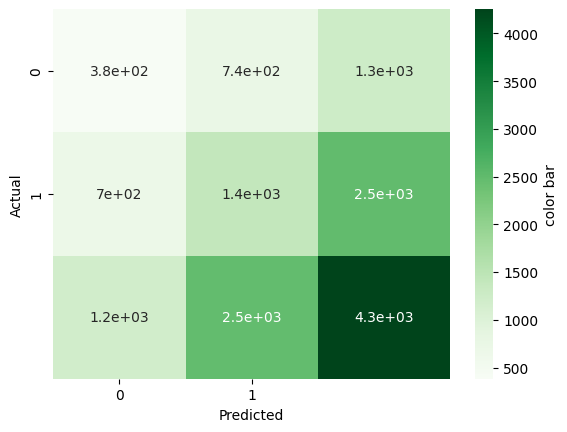

In [94]:
sns.heatmap(cm1,cmap='Greens',annot=True,cbar_kws={'orientation':'vertical','label':'color bar'},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

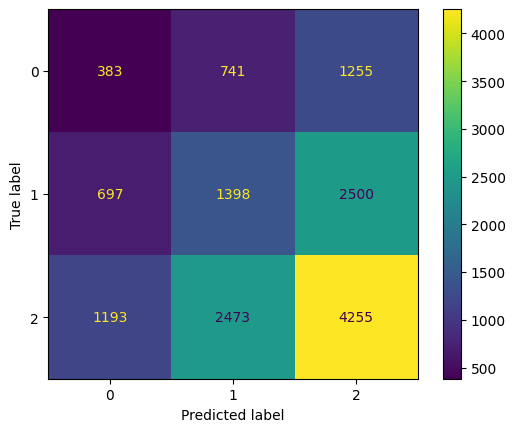

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
cm_disp1.plot()

# **SVM**

In [59]:
# Import and build Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [79]:
# Predict the outcome using Test data
y1_predict = svc.predict(x_test)

In [80]:
# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y1_predict)

In [81]:
cm

array([[   0,    0, 2379],
       [   0,    0, 4595],
       [   0,    0, 7921]])

In [82]:
score = svc.score(x_test, y_test)

In [83]:
score

0.5317891910036925

## **SVM Confusion Matrix Plots**

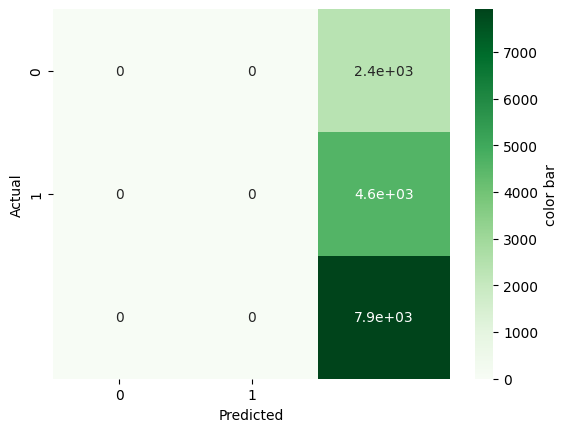

In [93]:
sns.heatmap(cm,cmap='Greens',annot=True,cbar_kws={'orientation':'vertical','label':'color bar'},
            xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

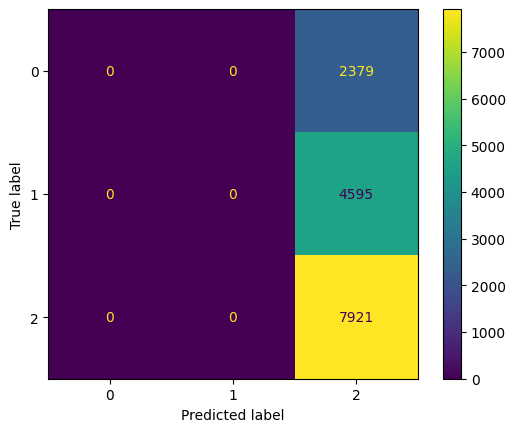

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()